In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class LinearRegression():
    """
    Constructor takes two arguments 
    X : Numpy array of size m * n where m is number of training examples and n is number of features (including bias) 
        Each row contains features (including bias) of a single training example       
    y : Numpy array of size m * 1 where m is number of training examples 
        Each row contains ground truth for each training example
    """
    
    def __init__(self, X, y):
        """
        Initializes required variables
        theta : theta is a numpy array of size n * 1
                This is a vector of model parameters
        """
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.theta = np.zeros((self.n, 1))
    
    def meanSquaredError(self, reg_coeff = 0):
        """
        This method calculates regularized cost and returns a tuple containing cost and gradients.
        This method takes 
        reg_coeff : Regularization co-efficient
        
        """
        prediction = np.dot(self.X, self.theta)
        cost = np.sum(np.power(prediction - self.y, 2)) / (2 * self.m) + (reg_coeff / (2 * self.m)) * (np.dot(np.transpose(self.theta), self.theta)[0][0] - self.theta[0]**2)
        grads = np.dot(np.transpose(self.X), prediction - self.y) / self.m + (reg_coeff / self.m) * self.theta
        grads[0] -= (reg_coeff / self.m * self.theta[0])
        return cost, grads
    
    def gradientDescent(self, cost_grad_func, iters, alpha, reg_coeff = 0):
        """
        This method optimizes the cost function by adjusting theta.
        This returns a list containing cost at each iteration.
        This method takes 
        cost_grad_func : This is a function that returns cost and gradients.
        iters : Number of iterations to be done in gradient descent
        alpha : Learning rate
        reg_coeff : Regularization co-efficient
        """
        cost_history = []
        for i in range(iters):
            cost, grads = cost_grad_func(reg_coeff)
            self.theta = self.theta - alpha * grads
            cost_history.append(cost)
        return cost_history
    
    def fit(self, cost_func : str, optimizer : str, alpha : float = 0.001, iters : int = 100, reg_coeff : float= 0):
        """
        This method fits the line to the data and returns a tuple containing cost_history and optimized theta  
        This method takes
        cost_func : String specifying which cost function to use 
                    This can take "mse" or "meanSqauredError"  for mean squared error
                    More cost functions would be added in future
        optimizer : String specifying which optimization function to use 
                    This can take "gd" or "gradientDescent"  for Gradient Descent
                    More optimizers would be added in future
        alpha : Learning rate for optimization function (if applicable)
        iters : Specify number of iterations for optimization function (if applicable)
        reg_coeff : Regularization co-efficient 
        """
        self.theta = np.zeros((self.n,1))
        cost_functions = {"mse":self.meanSquaredError, "meanSquaredError":self.meanSquaredError}
        optimizers = {"gd":self.gradientDescent(cost_functions[cost_func], iters, alpha, reg_coeff)
                     ,"gradientDescent":self.gradientDescent(cost_functions[cost_func], iters, alpha, reg_coeff)
                     }    
        return optimizers[optimizer], self.theta
    def predict(self, X):
        """
        This method returns the predictions for the given examples
        Ideally you'd want to call this after fitting using fit()
        This method takes:
        X : Numpy array where each row contains features of examples
        """
        return np.dot(X, self.theta)
    def gradientDescentDemo(self, cost_grad_func, iters, alpha, reg_coeff = 0):
        """
        This method is just used for demo of gradient change over iterations"""
        grad_history = []
        cost_history = []
        for i in range(iters):
            cost, grads = cost_grad_func(reg_coeff)
            lr.theta = lr.theta - alpha * grads
            cost_history.append(cost)
            grad_history.append(grads)
        return cost_history, grad_history

In [3]:
#sample data
data = np.array([[1,6.1101,17.592],[1,5.5277,9.1302],[1,8.5186,13.662],[1,7.0032,11.854],[1,5.8598,6.8233],[1,8.3829,11.886],[1,7.4764,4.3483],[1,8.5781,12],[1,6.4862,6.5987],[1,5.0546,3.8166],[1,5.7107,3.2522],[1,14.164,15.505],[1,5.734,3.1551],[1,8.4084,7.2258],[1,5.6407,0.71618],[1,5.3794,3.5129],[1,6.3654,5.3048],[1,5.1301,0.56077],[1,6.4296,3.6518],[1,7.0708,5.3893],[1,6.1891,3.1386],[1,20.27,21.767],[1,5.4901,4.263],[1,6.3261,5.1875],[1,5.5649,3.0825],[1,18.945,22.638],[1,12.828,13.501],[1,10.957,7.0467],[1,13.176,14.692],[1,22.203,24.147],[1,5.2524,-1.22],[1,6.5894,5.9966],[1,9.2482,12.134],[1,5.8918,1.8495],[1,8.2111,6.5426],[1,7.9334,4.5623],[1,8.0959,4.1164],[1,5.6063,3.3928],[1,12.836,10.117],[1,6.3534,5.4974],[1,5.4069,0.55657],[1,6.8825,3.9115],[1,11.708,5.3854],[1,5.7737,2.4406],[1,7.8247,6.7318],[1,7.0931,1.0463],[1,5.0702,5.1337],[1,5.8014,1.844],[1,11.7,8.0043],[1,5.5416,1.0179],[1,7.5402,6.7504],[1,5.3077,1.8396],[1,7.4239,4.2885],[1,7.6031,4.9981],[1,6.3328,1.4233],[1,6.3589,-1.4211],[1,6.2742,2.4756],[1,5.6397,4.6042],[1,9.3102,3.9624],[1,9.4536,5.4141],[1,8.8254,5.1694],[1,5.1793,-0.74279],[1,21.279,17.929],[1,14.908,12.054],[1,18.959,17.054],[1,7.2182,4.8852],[1,8.2951,5.7442],[1,10.236,7.7754],[1,5.4994,1.0173],[1,20.341,20.992],[1,10.136,6.6799],[1,7.3345,4.0259],[1,6.0062,1.2784],[1,7.2259,3.3411],[1,5.0269,-2.6807],[1,6.5479,0.29678],[1,7.5386,3.8845],[1,5.0365,5.7014],[1,10.274,6.7526],[1,5.1077,2.0576],[1,5.7292,0.47953],[1,5.1884,0.20421],[1,6.3557,0.67861],[1,9.7687,7.5435],[1,6.5159,5.3436],[1,8.5172,4.2415],[1,9.1802,6.7981],[1,6.002,0.92695],[1,5.5204,0.152],[1,5.0594,2.8214],[1,5.7077,1.8451],[1,7.6366,4.2959],[1,5.8707,7.2029],[1,5.3054,1.9869],[1,8.2934,0.14454],[1,13.394,9.0551],[1,5.4369,0.61705]])

In [4]:
#Normalizing data
avgs = np.average(data[:,1:], axis = 0)
stds = np.std(data[:,1:], axis = 0)
data[:,1] = (data[:,1] - avgs[0])/stds[0]
data[:,2] = (data[:,2] - avgs[1])/stds[1]

In [5]:
#seperating labels from features
X = data[:,:2]
y = data[:,2:3]

In [6]:
lr = LinearRegression(X, y)
cost_history, theta = lr.fit("mse","gd",0.03,100)

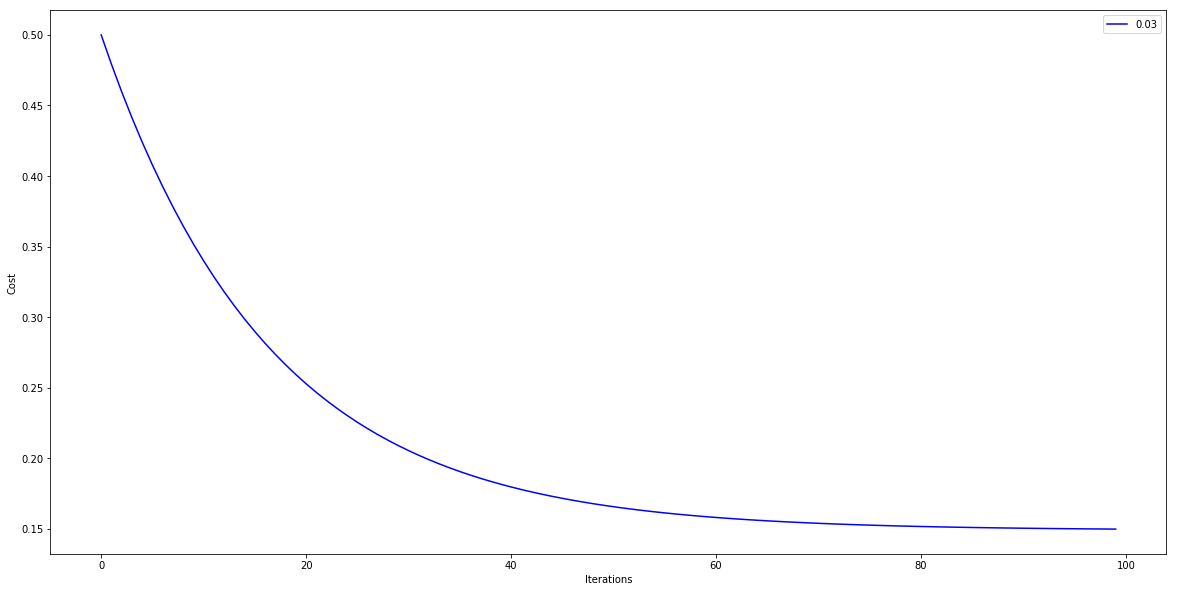

In [7]:
#Cost progress in gradient descent
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(range(len(cost_history)), cost_history, "b-", label = 0.03)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

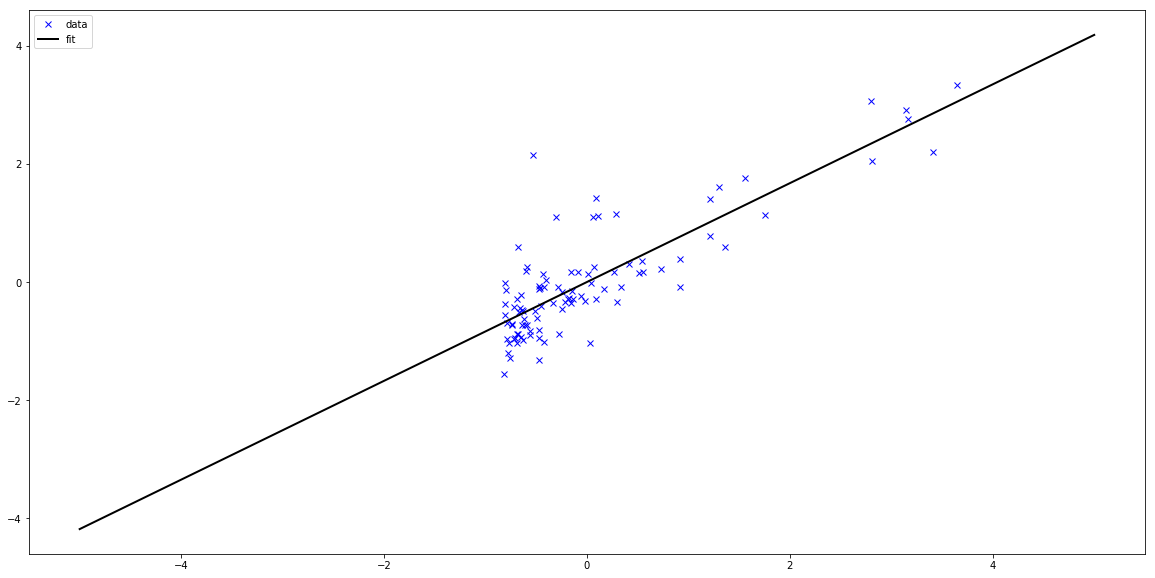

In [8]:
plt.plot(X[:,1:], y, 'bx',label = 'data')
plt.rcParams["figure.figsize"] = (20,10)
plt.plot([-5, 5], lr.predict(np.array([[1, -5], [1, 5]])),'k-',lw=2,label = 'fit')
plt.legend()

In [9]:
cost_histories = []
alphas = [0.3, 0.1, 0.03, 0.01, 0.003]
for alpha in alphas:
    cost_histories.append(lr.fit("mse", "gd", alpha, 200))

Following two plots show cost variation for different learning rates 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003<br>
<ul>
<li>In first plot as the learning rate increases from 0.003 gradient descend converges in less iterations until 0.3</li>
<li>In second plot for even higher learning rates the cost increases and gradient descent doesn't converge</li>
</ul>
<p><b>Note:&nbsp;</b>First plot has linear y scale whereas second one has logarithmic y scale</p>

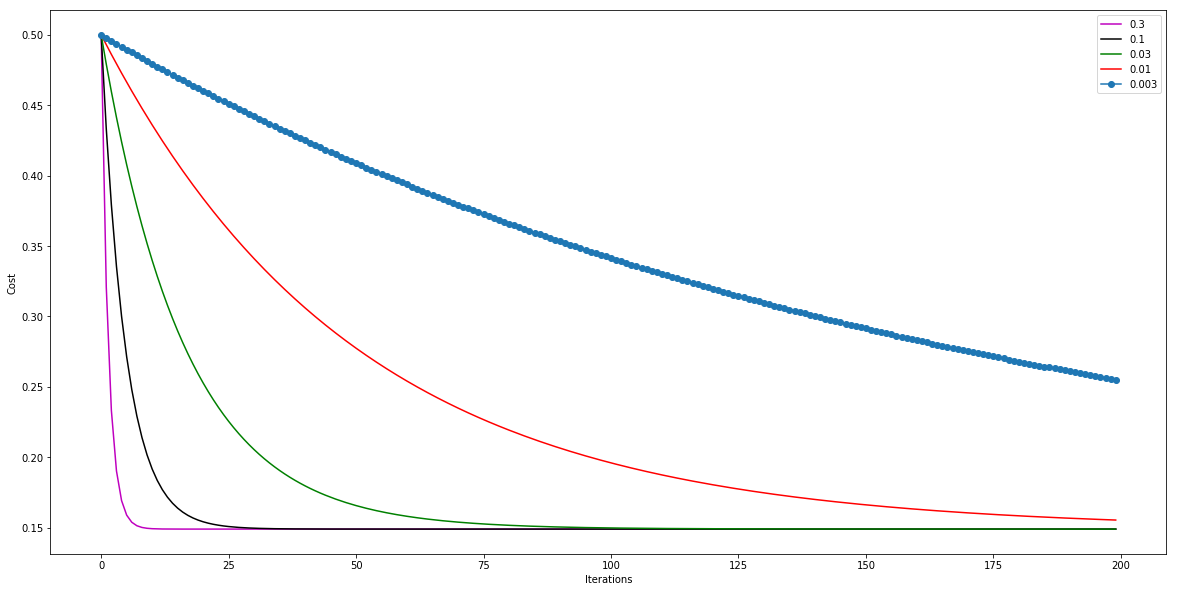

In [10]:
colors = ['m', 'k', 'g', 'r', 'o', 'b', 'y']
plt.rcParams["figure.figsize"] = (20,10)
for i, cost in enumerate(cost_histories):
    plt.plot(range(len(cost[0])), cost[0], colors[i]+"-", label = alphas[i])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [11]:
large_alphas = [10, 3, 1]
cost_histories_2 = []
for alpha in large_alphas:
    cost_histories_2.append(lr.fit("mse", "gd", alpha, 100))

c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in power
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
c:\users\mst\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


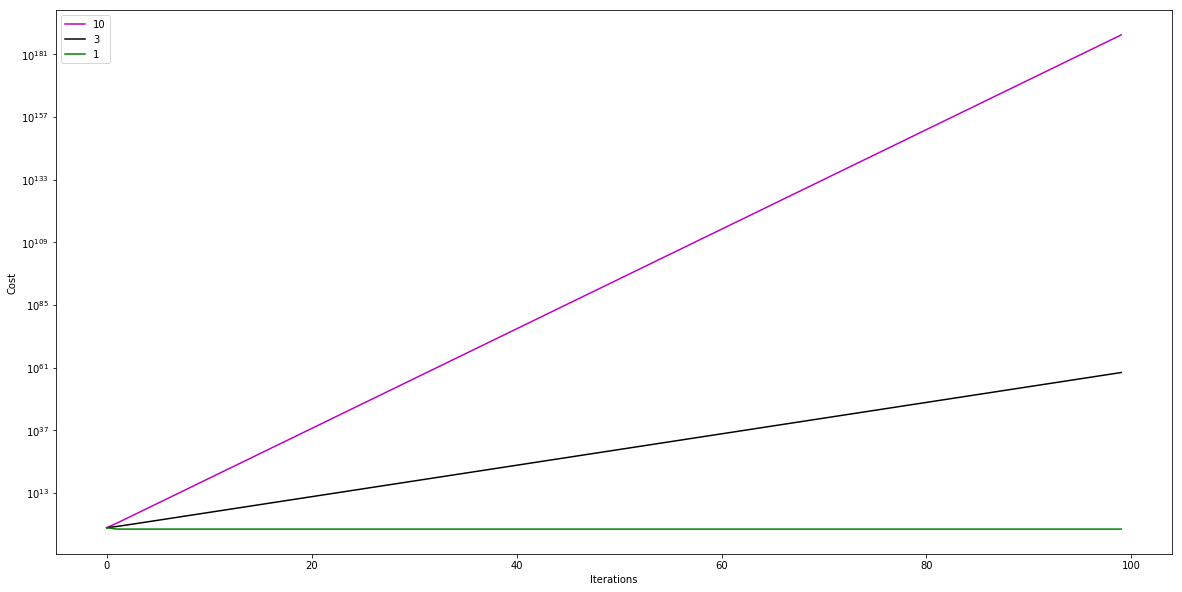

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
for i, cost in enumerate(cost_histories_2):
    plt.plot(range(len(cost[0])), cost[0], colors[i]+"-", label = large_alphas[i])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.yscale("log")
plt.legend()
axes=plt.gca()

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

theta_0 = np.arange(-4, 4, 0.05)
theta_1 = np.arange(-4,4,0.05)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

In [14]:
cost_matrix=[]
for i in range(theta_0.shape[0]):
    for j in range(theta_0.shape[1]):
        lr.theta = np.array([[theta_0[i][j]],[theta_1[i][j]]])
        cost_matrix.append(lr.meanSquaredError()[0][0])

In [15]:
cost_matrix = np.array(cost_matrix).reshape(theta_1.shape)

Following show cost variation w.r.t parameters theta_0 and theta_1

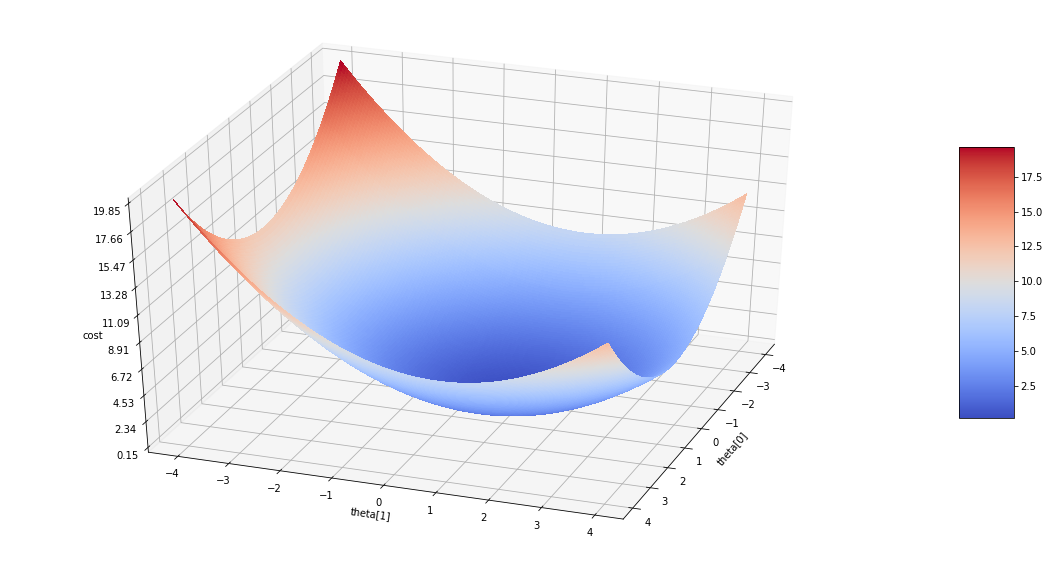

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_matrix, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("theta[0]")
ax.set_ylabel("theta[1]")
ax.set_zlabel("cost")
ax.view_init(elev=35, azim=20)


In gradient descent as we iterate, the step size decreases<br>
As we get closer to optimal value of theta, slope decreases<br>
hence step size decreases

In [17]:
cost_history, grad_history = lr.gradientDescentDemo(lr.meanSquaredError, 100, 0.03) 
step_history = np.array(grad_history) * 0.03

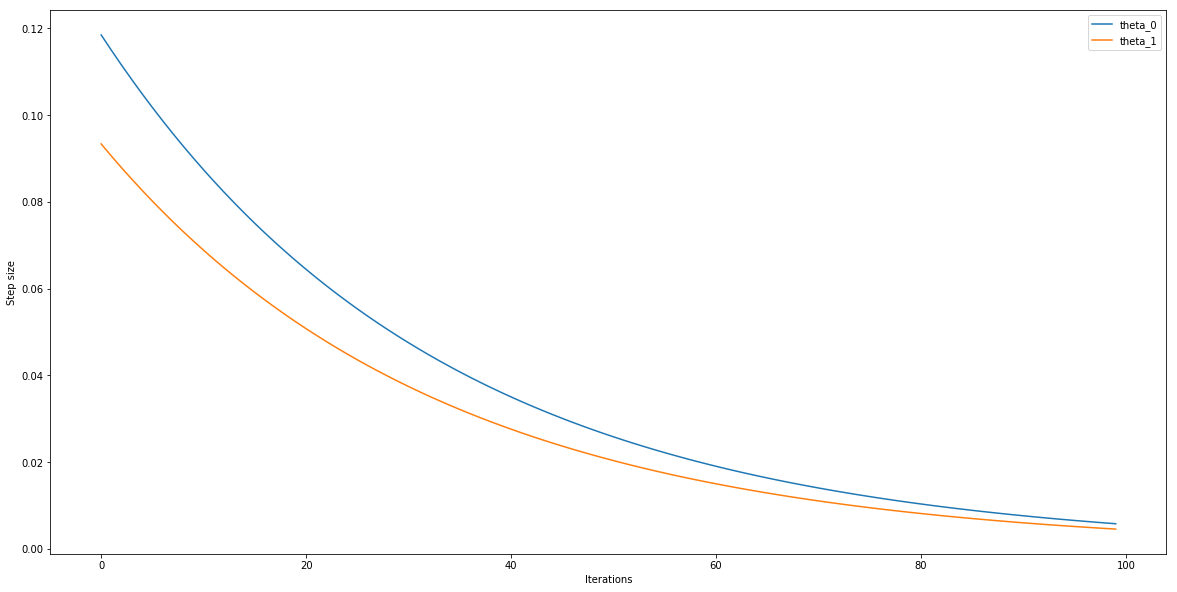

In [18]:
#Step size for theta_0
plt.plot(np.abs(step_history.reshape(100,2)[:,0]), label = "theta_0")
#Step size for theta_1
plt.plot(np.abs(step_history.reshape(100,2)[:,1]), label = "theta_1")
plt.xlabel("Iterations")
plt.ylabel("Step size")
plt.legend()